<a href="https://colab.research.google.com/github/Oladeji/gittest/blob/master/20042345__CVD_Prediction2_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet
!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [2]:
from sklearn.model_selection import StratifiedKFold , train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import opendatasets as opendts
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

import warnings
import os


warnings.filterwarnings(action='ignore')
###check the version /seee if it is installed
opendts.version()

'0.1.22'

In [3]:

url='https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/download'

### I will try this later too
#Heart Disease Health Indicators Dataset
#253,680 survey responses from cleaned BRFSS 2015 - binary classification


In [4]:

opendts.download(url)

100%|██████████| 742k/742k [00:00<00:00, 49.7MB/s]

# New section

In [5]:

data_dir = './cardiovascular-disease-dataset'

In [6]:
os.listdir(data_dir)

['cardio_train.csv']

In [7]:
complete_dataset_csv= data_dir + '/cardio_train.csv'

In [8]:
complete_dataset_csv

'./cardiovascular-disease-dataset/cardio_train.csv'

In [9]:
complete_dataset = pd.read_csv(complete_dataset_csv,";")
complete_dataset.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


the following features are important and missing -- fasting blood sugar

In [10]:
complete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Drop the Id column because it was auto generated ,
and The units Age and height were converted from days and  centimetres to years feet  for easier explanation of exploratory finding. 

In [11]:

clean_dt=complete_dataset.drop(['id'],axis=1)
clean_dt['age'] = (clean_dt['age']/365).round(0)
clean_dt['height'] = (clean_dt['height']* 0.0328084).round(2)
clean_dt.shape


(70000, 12)

In [12]:
clean_dt.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,5.391931,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,0.269297,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,1.800000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,5.220000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,5.410000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,5.580000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,8.200000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


This is data cleaning,  
Replace height that are less that minimum height with mean height 

same with Blood Pressure

In [13]:
#replace wrong/icorrect heigth with mean
clean_dt.loc[clean_dt['height'] < 2.366, ['height']] = 5.391931000
incorrectheight =  clean_dt['height'] ==5.391931
clean_dt[incorrectheight]['height']


#replace wrong/incorrect high blood presure with mean
clean_dt.loc[clean_dt['ap_hi'] <0, ['ap_hi']] = 128.817286
incorrectheight =  clean_dt['ap_hi'] ==5.391931
clean_dt[incorrectheight]['ap_hi']


#replace wrong/incorrect low blood presure with mean
clean_dt.loc[clean_dt['ap_lo'] <0, ['ap_lo']] = 96.630414
incorrectheight =  clean_dt['ap_lo'] ==96.630414
clean_dt[incorrectheight]['ap_lo']





#replace wrong/incorrect high blood presure with mean
clean_dt.loc[clean_dt['ap_hi'] >370, ['ap_hi']] = 128.817286
incorrectheight =  clean_dt['ap_hi'] ==5.391931
clean_dt[incorrectheight]['ap_hi']


#replace wrong/incorrect low blood presure with mean
clean_dt.loc[clean_dt['ap_lo'] >360, ['ap_lo']] = 96.630414
incorrectheight =  clean_dt['ap_lo'] ==96.630414
clean_dt[incorrectheight]['ap_lo']


228      96.630414
241      96.630414
260      96.630414
329      96.630414
345      96.630414
           ...    
69771    96.630414
69872    96.630414
69878    96.630414
69885    96.630414
69967    96.630414
Name: ap_lo, Length: 954, dtype: float64

In [14]:
clean_dt.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,5.392763,74.205690,126.709837,81.533692,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,0.264229,14.395757,18.043811,9.997925,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,2.430000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,5.220000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,5.410000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,5.580000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,8.200000,200.000000,309.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
clean_dt.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,5.51,62.0,110.0,80.0,1,1,0,0,1,0
1,55.0,1,5.12,85.0,140.0,90.0,3,1,0,0,1,1
2,52.0,1,5.41,64.0,130.0,70.0,3,1,0,0,0,1
3,48.0,2,5.54,82.0,150.0,100.0,1,1,0,0,1,1
4,48.0,1,5.12,56.0,100.0,60.0,1,1,0,0,0,0
5,60.0,1,4.95,67.0,120.0,80.0,2,2,0,0,0,0
6,61.0,1,5.15,93.0,130.0,80.0,3,1,0,0,1,0
7,62.0,2,5.84,95.0,130.0,90.0,3,3,0,0,1,1
8,48.0,1,5.18,71.0,110.0,70.0,1,1,0,0,1,0
9,54.0,1,5.38,68.0,110.0,60.0,1,1,0,0,0,0


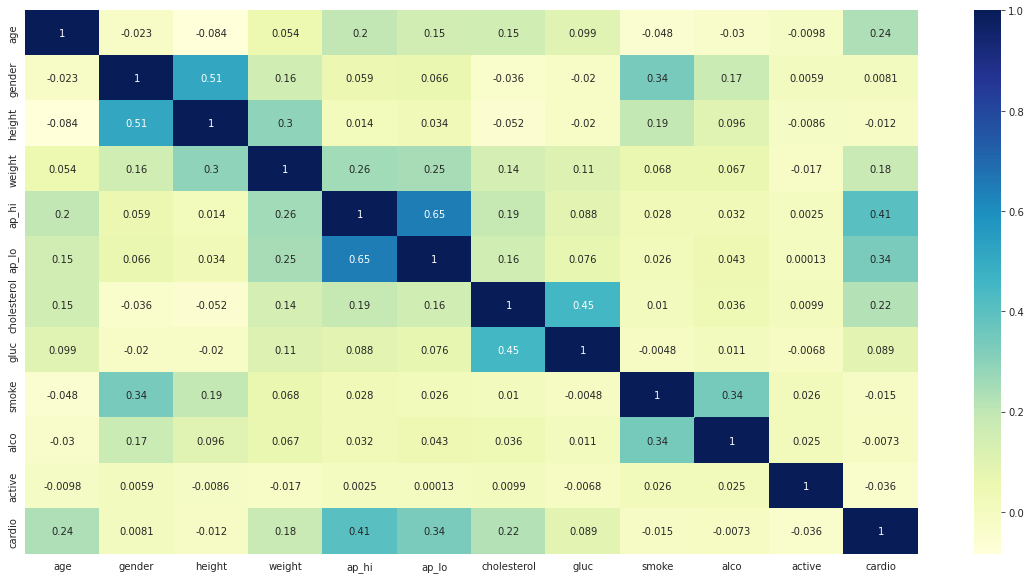

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(clean_dt.corr(), cmap="YlGnBu", annot=True)

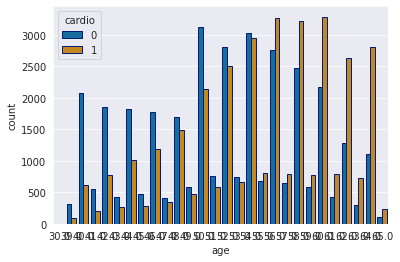

In [17]:
sns.countplot(x='age',hue='cardio',data=clean_dt,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [18]:
fig = px.histogram(clean_dt, x="age", 
                    color = "cardio", marginal = 'box',
                   nbins = 30)
fig.show()

In [19]:
clean_dt.shape

(70000, 12)

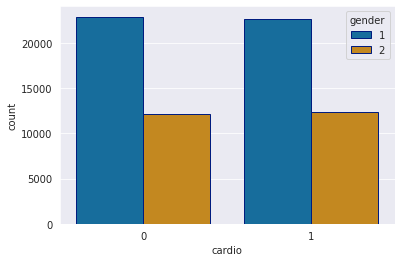

In [20]:
sns.countplot(x='cardio',hue='gender',data=clean_dt,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [21]:
fig = px.histogram(clean_dt, x="cardio", color='gender', color_discrete_sequence = ['navy','darkorange'])
fig.show()

In [22]:
px.histogram(clean_dt, x='cardio', title='alco vs. cardio', color='gender')

In [23]:
px.histogram(clean_dt, 
             x='smoke', 
             title='Smoke vs Non Smoker', 
             color='cardio')

In [24]:
px.scatter(clean_dt.sample(2000), 
           title='Systolic Pressure vs  Age',
           x='ap_hi', 
           y='age', 
           color='cardio')

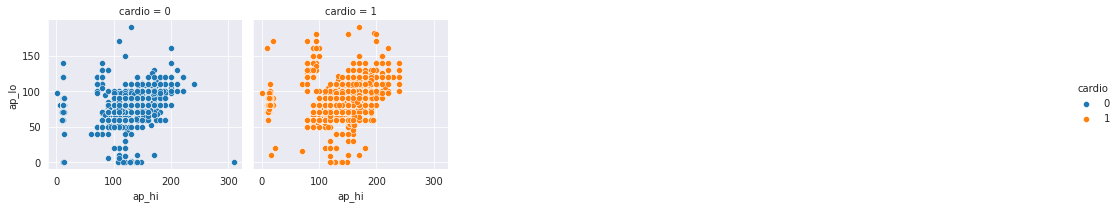

In [25]:


grid = sns.FacetGrid(clean_dt, col = "cardio", hue = "cardio", col_wrap=5)
grid.map(sns.scatterplot, "ap_hi", "ap_lo")

grid.add_legend()

plt.show()

Stratify Fold Cross validatio

DIVIDE THE CLEANED DATA IN FEATURES AND LABELS 

In [26]:
target_col='cardio'
input_cols = list(clean_dt.columns)[0:-1]
features = clean_dt[input_cols]
labels = clean_dt[target_col]

Splitting Data into Training cross validation and Testing in ration 60 20 20

In [27]:
from numpy.core.fromnumeric import shape
train_features,hold_out_features,train_labels,hold_out_labels = train_test_split(features,labels,test_size=0.4,random_state=42)


In [28]:
test_features,val_features,test_labels,val_labels= train_test_split(hold_out_features,hold_out_labels ,test_size=0.5)


Normalise the data , Make sure you have your scaler MinMaxScaler fitted on the 

In [29]:

scaler = MinMaxScaler().fit(clean_dt[input_cols])
train_features[input_cols]= scaler.transform(train_features[input_cols])
test_features[input_cols]= scaler.transform(test_features[input_cols])
val_features[input_cols]= scaler.transform(val_features[input_cols])
#scaler.fit_transform(clean_dt)
#clean_dt = pd.DataFrame(scaler.fit_transform(clean_dt),columns= clean_dt.columns)


Print the percentage of training validation and testing
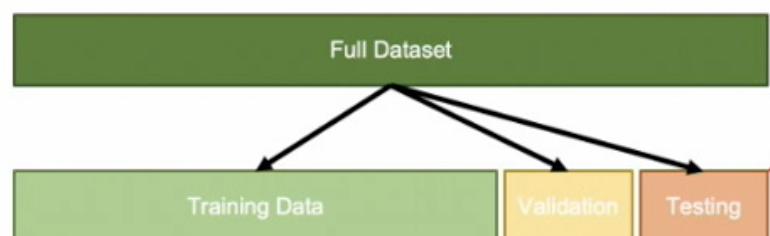

In [30]:
for dataset in[train_labels,hold_out_labels,test_labels,val_labels ] :
 
  print (round((len(dataset)/len(labels)),2),sep= '  ')

0.6
0.4
0.2
0.2


In [31]:
train_labels

11609    1
4660     0
49596    0
35299    1
648      1
        ..
37194    1
6265     1
54886    0
860      0
15795    0
Name: cardio, Length: 42000, dtype: int64

In [32]:
train_features

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
11609,0.857143,0.0,0.533795,0.310526,0.386364,0.421053,0.0,0.0,0.0,1.0,1.0
4660,0.914286,1.0,0.493934,0.236842,0.386364,0.421053,0.0,0.0,0.0,0.0,1.0
49596,0.285714,0.0,0.357019,0.278947,0.353896,0.368421,0.0,0.0,0.0,0.0,0.0
35299,0.742857,0.0,0.443674,0.236842,0.418831,0.421053,0.0,0.0,0.0,0.0,1.0
648,0.800000,0.0,0.476603,0.394737,0.451299,0.473684,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
37194,0.400000,1.0,0.545927,0.342105,0.483766,0.421053,0.0,0.0,1.0,0.0,1.0
6265,0.971429,1.0,0.499133,0.331579,0.516234,0.473684,0.0,0.0,0.0,0.0,1.0
54886,1.000000,0.0,0.538995,0.336842,0.386364,0.421053,0.0,0.0,0.0,0.0,1.0
860,0.571429,0.0,0.528596,0.315789,0.386364,0.421053,0.0,0.0,0.0,0.0,0.0


We shuffle the cross validation to obtain meaniful data


In [33]:
models_list = {
    'SVM': {
        'model': SVC(gamma='auto',random_state=42),
        'params' : { 'C': [1,10,20], 'kernel': ['rbf','linear']}  
           },
    'KNN': {
        'model':KNeighborsClassifier(),
        'params' : { 'n_neighbors': [1,5,10]}  
           },

    'XGBOOST': {
        'model':XGBClassifier(random_state=42, verbosity=1),
        'params' :{"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 10, 20],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[1,5,10],
                'gamma': [0.5, 1, 1.5, 2, 5],
             }



             
           },

    'RANDOM_FOREST': {
        'model': RandomForestClassifier(random_state=42),
        'params' : {
             'n_estimators': [1,5,10],
             'max_depth':[2,5,10,None],
             'max_features': ['auto', 'sqrt', 'log2'],
             'criterion' :['gini', 'entropy']
             }

    },
    'LOGISTIC REGRESSION' : {
        'model': LogisticRegression(random_state=42,multi_class='auto'),
        'params': {
            'C': [1,5,10],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    }
    ,
    'NAIVE_BAIYES_GUASIAN': {
        'model': GaussianNB(),
        'params': {}
    },
    'NAIVE_BAISE_MULTINOMIAL': {
        'model': MultinomialNB(),
        'params': {}
    },
    'DECISION_TREE': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}


Based on above, I can conclude that SVM with C=1 and kernel='rbf' is the best model for solving my problem of iris flower classification

In [34]:
modelscoresrand = []
cvno=10
for name, parameters in models_list.items():
    model =  RandomizedSearchCV(parameters['model'], parameters['params'], random_state=42,cv=cvno, n_iter=4,return_train_score=False)
    #model =  GridSearchCV(parameters['model'], parameters['params'], cv=cvno, return_train_score=False)
    model.fit(train_features,train_labels)
    modelscoresrand.append({
        'Model': name,
        'Best_score': model.best_score_,
        'Best_params': model.best_params_
    })
    
df = pd.DataFrame(modelscoresrand,columns=['Model','Best_score','Best_params'])


In [35]:
df=df.sort_values('Best_score',ascending=False)
df

,Model,Best_score,Best_params
2,XGBOOST,0.730762,"{'subsample': 0.75, 'n_estimators': 10, 'min_c..."
3,RANDOM_FOREST,0.730286,"{'n_estimators': 10, 'max_features': 'log2', '..."
0,SVM,0.728476,"{'kernel': 'rbf', 'C': 10}"
4,LOGISTIC REGRESSION,0.726119,"{'solver': 'newton-cg', 'C': 1}"
5,NAIVE_BAIYES_GUASIAN,0.705810,{}
1,KNN,0.704381,{'n_neighbors': 10}
7,DECISION_TREE,0.635500,{'criterion': 'entropy'}
6,NAIVE_BAISE_MULTINOMIAL,0.588714,{}


In [36]:
modelscoresrand

[{'Best_params': {'C': 10, 'kernel': 'rbf'},
  'Best_score': 0.7284761904761905,
  'Model': 'SVM'},
 {'Best_params': {'n_neighbors': 10},
  'Best_score': 0.7043809523809523,
  'Model': 'KNN'},
 {'Best_params': {'colsample_bytree': 0.75,
   'gamma': 0.5,
   'learning_rate': 0.3,
   'max_depth': 20,
   'min_child_weight': 15,
   'n_estimators': 10,
   'subsample': 0.75},
  'Best_score': 0.7307619047619047,
  'Model': 'XGBOOST'},
 {'Best_params': {'criterion': 'entropy',
   'max_depth': 10,
   'max_features': 'log2',
   'n_estimators': 10},
  'Best_score': 0.7302857142857142,
  'Model': 'RANDOM_FOREST'},
 {'Best_params': {'C': 1, 'solver': 'newton-cg'},
  'Best_score': 0.7261190476190477,
  'Model': 'LOGISTIC REGRESSION'},
 {'Best_params': {},
  'Best_score': 0.7058095238095239,
  'Model': 'NAIVE_BAIYES_GUASIAN'},
 {'Best_params': {},
  'Best_score': 0.5887142857142857,
  'Model': 'NAIVE_BAISE_MULTINOMIAL'},
 {'Best_params': {'criterion': 'entropy'},
  'Best_score': 0.6355000000000001,
  

In [37]:
from sklearn.metrics import f1_score
def print_accuracy_precision_recall(theset,model ,features,labels ):
    y_pred= model.predict(features)
    accuracy= round(accuracy_score(labels,y_pred),3)* 100
    precision= round(precision_score(labels,y_pred),3)* 100
    recall= round(recall_score(labels,y_pred),3)* 100
   
    f1score = round(f1_score(labels,y_pred, average="macro"),3)* 100

    print(f'The Accuracy ,Precision  Recall  and Macro F1-Score for {theset} are : {accuracy}, {precision} ,  {recall} and {f1score} ')

FITTING A MODEL TO XGBOOST

In [60]:
%%time
xgbmodel = XGBClassifier(random_state=42, verbosity=1,subsample= 0.75, n_estimators= 10, min_child_weight= 15, max_depth= 20, learning_rate= 0.03, colsample_bytree= 0.75)

xgbmodel.fit(train_features,train_labels)




CPU times: user 1.4 s, sys: 7.94 ms, total: 1.41 s
Wall time: 1.52 s


fitting A RANDOM FOREST MODEL BASED ON THE HYPERPARAMETER 

Since Randomforest seems promising i will use Grid serach cv for paarameter turning, but it will have inherent computation cost because of permutation on different parameter value substitution during fit but RandomiseSearchCV can be used to reduce the total time

In [61]:
%%time
rfmodel= RandomForestClassifier( random_state=42, n_estimators=10,max_depth=10 ,max_features='log2', criterion= 'entropy')
rfmodel.fit(train_features,train_labels)



CPU times: user 375 ms, sys: 3 ms, total: 378 ms
Wall time: 397 ms


FITTING  SVM ON  THE DATA

In [40]:
%%time
svmmodel= SVC(C = 10,  gamma = 'auto', kernel = 'rbf',random_state=42)
svmmodel.fit(train_features,train_labels)


CPU times: user 1min 25s, sys: 129 ms, total: 1min 26s
Wall time: 1min 25s


FITTING LOGISTIC REGRESSION

In [62]:
%%time
logisticmodel=  LogisticRegression(solver='newton-cg',multi_class='auto',C=1,random_state=42)
logisticmodel.fit(train_features,train_labels)



CPU times: user 457 ms, sys: 327 ms, total: 785 ms
Wall time: 629 ms


In [63]:
# XGBOOST
print_accuracy_precision_recall('TRAINING   OF    XGBOOST ',xgbmodel ,train_features,train_labels )
print_accuracy_precision_recall('VALIDATION OF    XGBOOST ',xgbmodel ,val_features,val_labels )
print_accuracy_precision_recall('TESTING.   OF    XGBOOST ',xgbmodel ,test_features,test_labels )

The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    XGBOOST  are : 74.3, 76.8 ,  69.3 and 74.2 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    XGBOOST  are : 73.5, 75.6 ,  69.1 and 73.4 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    XGBOOST  are : 74.1, 77.0 ,  69.5 and 74.1 


In [64]:
# RANDOM FOREST
print_accuracy_precision_recall('TRAINING   OF    RANDOM FOREST ',rfmodel ,train_features,train_labels )
print_accuracy_precision_recall('VALIDATION OF    RANDOM FOREST ',rfmodel ,val_features,val_labels )
print_accuracy_precision_recall('TESTING.   OF    RANDOM FOREST ',rfmodel ,test_features,test_labels )

The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    RANDOM FOREST  are : 75.0, 78.7 ,  68.10000000000001 and 74.8 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    RANDOM FOREST  are : 73.2, 76.5 ,  67.0 and 73.1 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    RANDOM FOREST  are : 73.6, 77.4 ,  67.5 and 73.5 


In [44]:
# SVM
print_accuracy_precision_recall('TRAINING   OF    SVM ',svmmodel ,train_features,train_labels )
print_accuracy_precision_recall('VALIDATION OF    SVM',svmmodel ,val_features,val_labels )
print_accuracy_precision_recall('TESTING.   OF    SVM ',svmmodel ,test_features,test_labels )

The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    SVM  are : 72.89999999999999, 76.2 ,  66.5 and 72.8 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    SVM are : 73.1, 76.1 ,  67.10000000000001 and 73.0 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    SVM  are : 73.5, 77.60000000000001 ,  66.9 and 73.4 


In [65]:
# LOGISTIC REGRESSION
print_accuracy_precision_recall('TRAINING   OF    LOGISTIC REGRESSION',logisticmodel ,train_features,train_labels )
print_accuracy_precision_recall('VALIDATION OF    LOGISTIC REGRESSION',logisticmodel ,val_features,val_labels )
print_accuracy_precision_recall('TESTING.   OF    LOGISTIC REGRESSION ',logisticmodel ,test_features,test_labels )

The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    LOGISTIC REGRESSION are : 72.6, 75.0 ,  67.60000000000001 and 72.5 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    LOGISTIC REGRESSION are : 72.7, 74.9 ,  68.10000000000001 and 72.7 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    LOGISTIC REGRESSION  are : 73.1, 76.2 ,  68.10000000000001 and 73.1 


In [45]:
The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    XGBOOST  are : 74.3, 76.8 ,  69.3 and 74.2 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    XGBOOST  are : 73.5, 75.6 ,  69.1 and 73.4 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    XGBOOST  are : 74.1, 77.0 ,  69.5 and 74.1 




The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    RANDOM FOREST  are : 75.0, 78.7 ,  68.10000000000001 and 74.8 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    RANDOM FOREST  are : 73.2, 76.5 ,  67.0 and 73.1 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    RANDOM FOREST  are : 73.6, 77.4 ,  67.5 and 73.5 






The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    SVM  are : 72.89999999999999, 76.2 ,  66.5 and 72.8 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    SVM are : 73.1, 76.1 ,  67.10000000000001 and 73.0 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    SVM  are : 73.5, 77.60000000000001 ,  66.9 and 73.4 






The Accuracy ,Precision  Recall  and Macro F1-Score for TRAINING   OF    LOGISTIC REGRESSION are : 72.6, 75.0 ,  67.60000000000001 and 72.5 
The Accuracy ,Precision  Recall  and Macro F1-Score for VALIDATION OF    LOGISTIC REGRESSION are : 72.7, 74.9 ,  68.10000000000001 and 72.7 
The Accuracy ,Precision  Recall  and Macro F1-Score for TESTING.   OF    LOGISTIC REGRESSION  are : 73.1, 76.2 ,  68.10000000000001 and 73.1 

Recursive Feature Elimination with Cross-Validation

In [66]:

def RFECV_ranking(X,y):
  rf = RandomForestClassifier( random_state=42, n_estimators=5,max_depth=10 ,max_features='auto', criterion= 'entropy')
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
  rfecv.fit(X,y)
  print('Optimal number of features: {}'.format(rfecv.n_features_))


  print(rfecv.get_support(indices=True))  
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()

  features = [f for f,s in zip(train_features.columns, rfecv.support_) if s]
  return features,rfecv

In [47]:
def RFECV_ranking(X,y):
  rf = RandomForestClassifier( random_state=42, n_estimators=5,max_depth=2 ,max_features='sqrt', criterion= 'gini')
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
  rfecv.fit(X,y)
  print('Optimal number of features: {}'.format(rfecv.n_features_))


  print(rfecv.get_support(indices=True))  
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()

  features = [f for f,s in zip(train_features.columns, rfecv.support_) if s]
  return features,rfecv

In [48]:
def RFECV_ranking(X,y):
  rf = RandomForestClassifier( random_state=42, n_estimators=5,max_depth=10 ,max_features='auto', criterion= 'entropy')
  rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
  rfecv.fit(X,y)
  print('Optimal number of features: {}'.format(rfecv.n_features_))


  print(rfecv.get_support(indices=True))  
  plt.figure(figsize=(16, 9))
  plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
  plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
  plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
  plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
  plt.show()

  features = [f for f,s in zip(train_features.columns, rfecv.support_) if s]
  return features,rfecv

Optimal number of features: 9
[ 0  2  3  4  5  6  7  9 10]


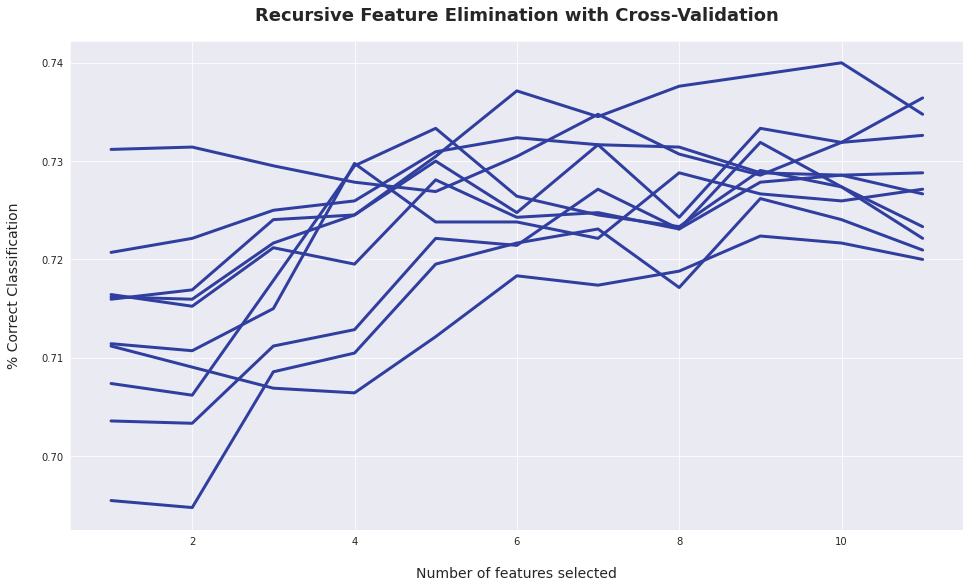

['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'alco',
 'active']

In [67]:
RFECV_features, RFECV_model=RFECV_ranking(train_features,train_labels)
RFECV_features

In [68]:
print('Optimal number of features: {}'.format(RFECV_model.n_features_))


print(RFECV_model.get_support(indices=True))  

Optimal number of features: 9
[ 0  2  3  4  5  6  7  9 10]


Feature Importance

In [69]:
imporatcedf=pd.DataFrame({
    'Feature':train_features.columns,
    'Importance':rfmodel.feature_importances_
})

imporatcedf.sort_values('Importance',ascending=False)

,Feature,Importance
4,ap_hi,0.396993
5,ap_lo,0.218293
0,age,0.115219
6,cholesterol,0.103634
3,weight,0.082525
2,height,0.042075
7,gluc,0.013962
10,active,0.008768
8,smoke,0.006804
9,alco,0.005937


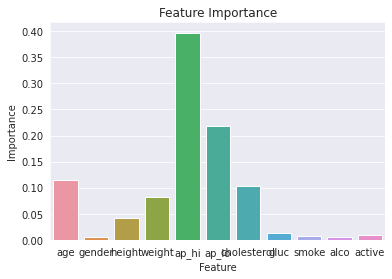

In [70]:
plt.title("Feature Importance")
sns.barplot(data =imporatcedf, x="Feature", y="Importance")

Prediction on the Test Set

In [71]:


from sklearn.metrics import confusion_matrix



def predict_and_plotnormalised(model ,inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds,normalize=          'true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('PREDICTION')
    plt.ylabel('TARGET')
    plt.title('{} CONFUSION MATRIX'. format(name));
    
    return preds



In [72]:
def predict_and_plot(model ,inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cf, annot=True, fmt=".1f")
    plt.xlabel('PREDICTION')
    plt.ylabel('TARGET')
    plt.title('{} CONFUSION MATRIX'. format(name));
    
    return preds


Accuracy: 73.60%


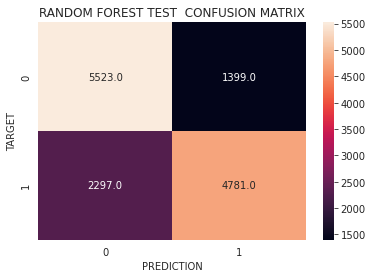

In [73]:
train_preds = predict_and_plot(rfmodel ,test_features,test_labels, 'RANDOM FOREST TEST ')

Accuracy: 73.60%


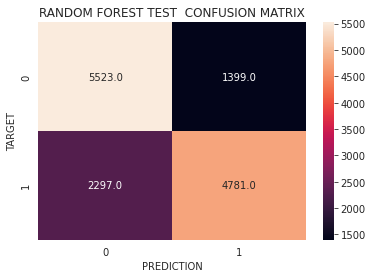

In [74]:
train_preds = predict_and_plot(rfmodel ,test_features,test_labels, 'RANDOM FOREST TEST ')

Accuracy: 73.10%


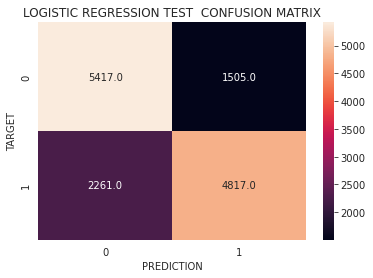

In [75]:
train_preds = predict_and_plot(logisticmodel ,test_features,test_labels, 'LOGISTIC REGRESSION TEST ')

Accuracy: 73.53%


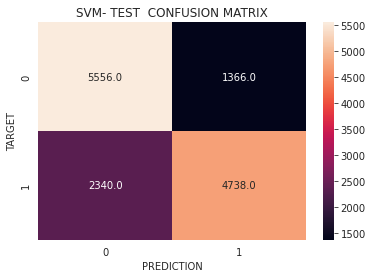

In [76]:
train_preds = predict_and_plot(svmmodel ,test_features,test_labels, 'SVM- TEST ')

TRAINIG A DECISION TREE MODEL

Accuracy: 74.09%


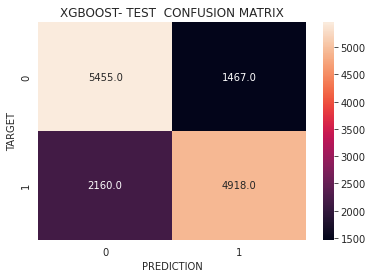

In [77]:
train_preds = predict_and_plot(xgbmodel ,test_features,test_labels, 'XGBOOST- TEST ')

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.